In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.options.display.max_rows = 100

In [2]:
df = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

In [3]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10497 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10497 non-null  object
 1   customer_lifetime_value        10497 non-null  int64 
 2   response                       10497 non-null  object
 3   coverage                       10497 non-null  object
 4   education                      10497 non-null  object
 5   effective_to_date              10497 non-null  object
 6   month                          10497 non-null  object
 7   employment_status              10497 non-null  object
 8   gender                         10497 non-null  object
 9   income                         10497 non-null  int64 
 10  location_code                  10497 non-null  object
 11  marital_status                 10497 non-null  object
 12  monthly_premium_auto           10497 non-null  int64 
 13  m

In [4]:
categoricals = df.select_dtypes(exclude='number')
categoricals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10497 entries, 0 to 10688
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   region             10497 non-null  object
 1   response           10497 non-null  object
 2   coverage           10497 non-null  object
 3   education          10497 non-null  object
 4   effective_to_date  10497 non-null  object
 5   month              10497 non-null  object
 6   employment_status  10497 non-null  object
 7   gender             10497 non-null  object
 8   location_code      10497 non-null  object
 9   marital_status     10497 non-null  object
 10  policy_type        10497 non-null  object
 11  policy             10497 non-null  object
 12  renew_offer_type   10497 non-null  object
 13  sales_channel      10497 non-null  object
 14  vehicle_class      10497 non-null  object
 15  vehicle_size       10497 non-null  object
dtypes: object(16)
memory usage: 1.4+ MB


In [5]:
numerical = df.select_dtypes(include='number')
numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10497 entries, 0 to 10688
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   customer_lifetime_value        10497 non-null  int64
 1   income                         10497 non-null  int64
 2   monthly_premium_auto           10497 non-null  int64
 3   months_since_last_claim        10497 non-null  int64
 4   months_since_policy_inception  10497 non-null  int64
 5   number_of_open_complaints      10497 non-null  int64
 6   number_of_policies             10497 non-null  int64
 7   total_claim_amount             10497 non-null  int64
dtypes: int64(8)
memory usage: 738.1 KB


<AxesSubplot:>

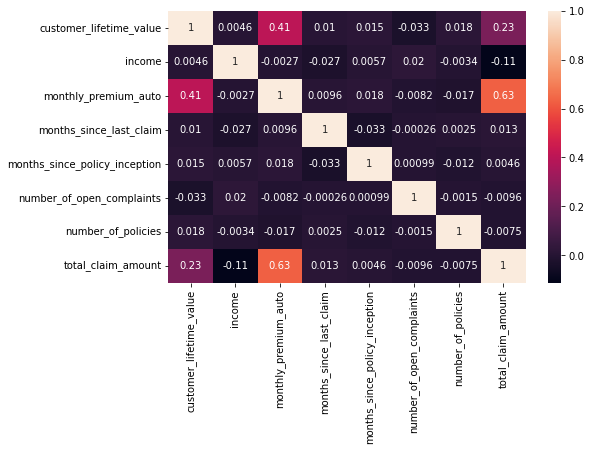

In [6]:
fig=plt.figure(figsize=(8,5))
sns.heatmap(numerical.corr(),annot=True)

def out_iqr(column):
    numerical.sort_values(column)
    Q1 = numerical[column].quantile([.25]) # get 1st quartile
    Q3 = numerical[column].quantile([.75]) # get 2nd quartile
    IQR = np.array(Q3) - np.array(Q1) # get IQR
    lower_range = int((np.array(Q1)) - (1.5 * IQR)) #lower range
    upper_range = int((np.array(Q3)) + (1.5 * IQR)) #upper range
    return lower_range ,upper_range

for col in numerical: #numerical_columns previusly defined
    lowerbound,upperbound = out_iqr(col) # get IQR bouns of a column with out_iqr function
    outliers = numerical[col][(numerical[col] < lowerbound)|(numerical[col]>upperbound)] # defining outliers
    print(col,":",len(outliers),"outliers")
    numerical[col]= numerical[col].drop(outliers.index) # removing outliers from column

In [7]:
categoricals=categoricals.drop(columns="effective_to_date")
categoricals.head()

,region,response,coverage,education,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize


In [8]:
categoricals_label = pd.get_dummies(categoricals,drop_first=True)
categoricals_label.head()

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [9]:
pd.get_dummies(categoricals, prefix=None, prefix_sep='', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

,regioncentral,regioneast,regionnorth west,regionwest region,responseno,responseyes,coveragebasic,coverageextended,coveragepremium,educationbachelor,...,sales_channelweb,vehicle_classfour-door car,vehicle_classluxury car,vehicle_classluxury suv,vehicle_classsports car,vehicle_classsuv,vehicle_classtwo-door car,vehicle_sizelarge,vehicle_sizemedsize,vehicle_sizesmall
0,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,1,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,0,0,1,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,1,0,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,1,0,0,0,1,0,0,0,1,1,...,1,0,1,0,0,0,0,0,1,0
10685,0,0,1,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
10686,1,0,0,0,1,0,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0
10687,0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


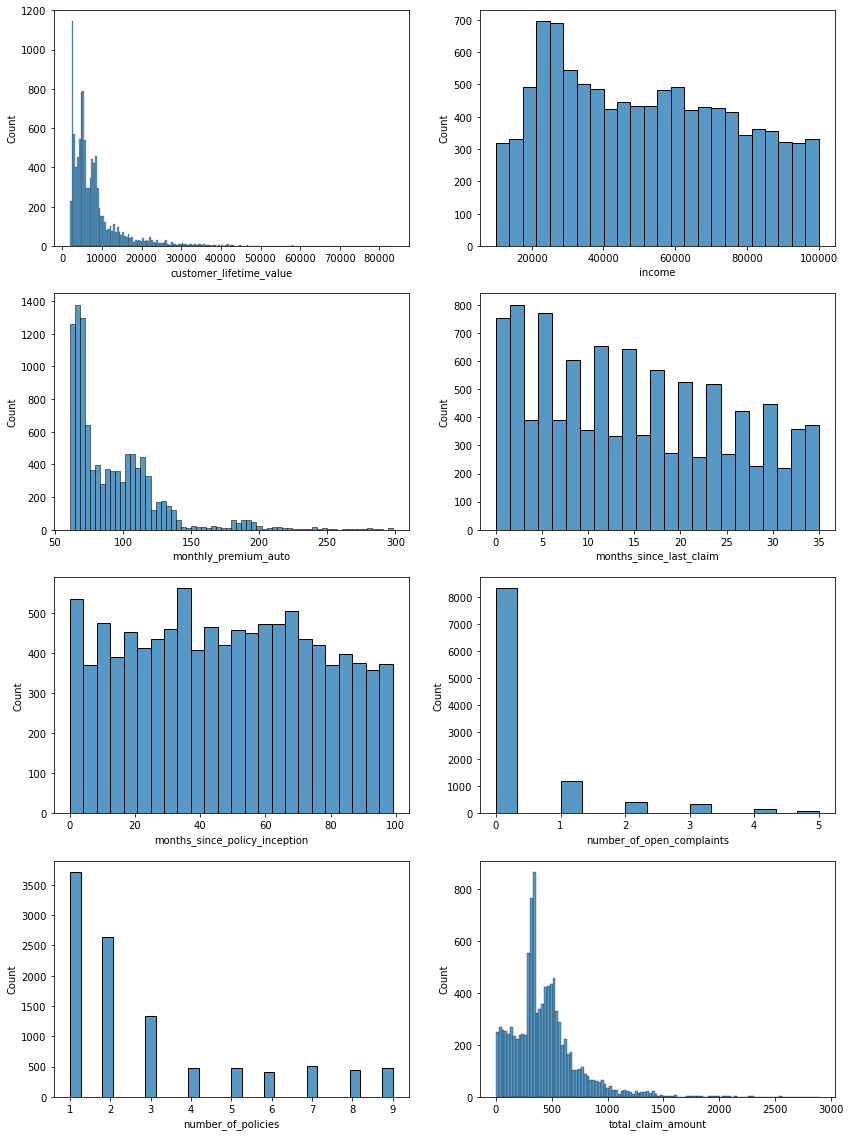

In [10]:
plt.subplots(figsize=(14, 20))
count=1
for i in numerical:
    plt.subplot(4,2,count) 
    sns.histplot(numerical[i]) 
    count+=1
plt.show()

In [11]:
Val_A = np.array(numerical.income).reshape(-1,1)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled= scaler.fit_transform(Val_A)
scaled

array([[0.42239616],
       [0.9141577 ],
       [0.13455039],
       ...,
       [0.33131726],
       [0.60213021],
       [0.6549075 ]])

C:\Users\javie\AppData\Local\Temp/ipykernel_1188/191677747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical["income"]=scaled


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,0.422396,61,7,52,0,9,292
1,2228,0.914158,64,3,26,0,1,744
2,14947,0.134550,100,34,31,0,2,480
3,22332,0.434059,97,10,3,0,2,484
4,9025,0.151628,117,33,31,0,7,707


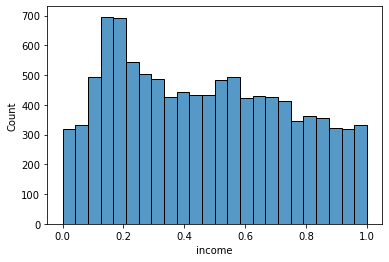

In [13]:
numerical["income"]=scaled
sns.histplot(numerical['income'])
numerical.head()

In [14]:
Val_B = np.array(numerical.customer_lifetime_value).reshape(-1,1)

In [15]:
from sklearn.preprocessing import StandardScaler
scalerB = StandardScaler()
scaledB= scalerB.fit_transform(Val_B)
scaledB

array([[-0.46659913],
       [-0.84322061],
       [ 1.01274555],
       ...,
       [ 2.31815267],
       [ 0.57848536],
       [-0.16775341]])

<AxesSubplot:ylabel='Count'>

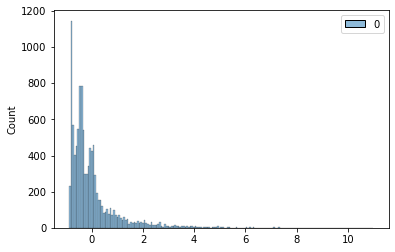

In [16]:
sns.histplot(scaledB)

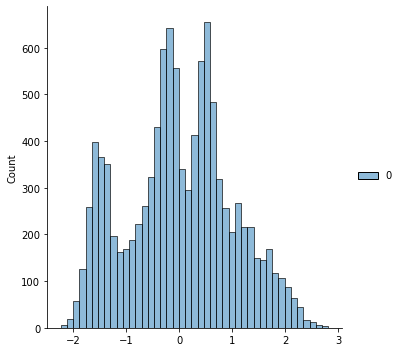

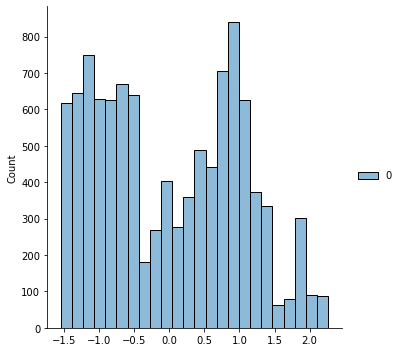

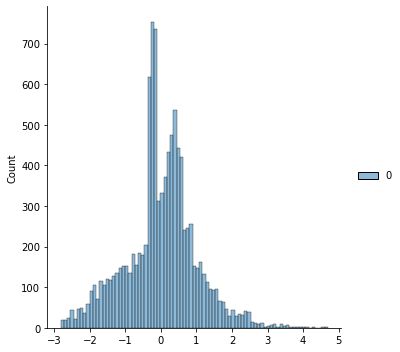

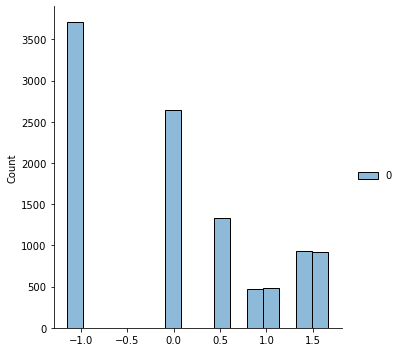

In [17]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
customer_lifetime_value_transformed=pt.fit_transform(numerical['customer_lifetime_value'].to_numpy().reshape(-1,1))
sns.displot(customer_lifetime_value_transformed)
monthly_premium_auto_transformed=pt.fit_transform(numerical['monthly_premium_auto'].to_numpy().reshape(-1,1))
sns.displot(monthly_premium_auto_transformed)
total_claim_amount_transformed=pt.fit_transform(numerical['total_claim_amount'].to_numpy().reshape(-1,1))
sns.displot(total_claim_amount_transformed)
total_claim_amount_transformed=pt.fit_transform(numerical['number_of_policies'].to_numpy().reshape(-1,1))
sns.displot(total_claim_amount_transformed)

In [18]:
numerical["customer_lifetime_value"]=customer_lifetime_value_transformed
numerical["monthly_premium_auto"]=monthly_premium_auto_transformed
numerical["total_claim_amount"]=total_claim_amount_transformed

C:\Users\javie\AppData\Local\Temp/ipykernel_1188/2333678960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical["customer_lifetime_value"]=customer_lifetime_value_transformed
C:\Users\javie\AppData\Local\Temp/ipykernel_1188/2333678960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical["monthly_premium_auto"]=monthly_premium_auto_transformed
C:\Users\javie\AppData\Local\Temp/ipykernel_1188/2333678960.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

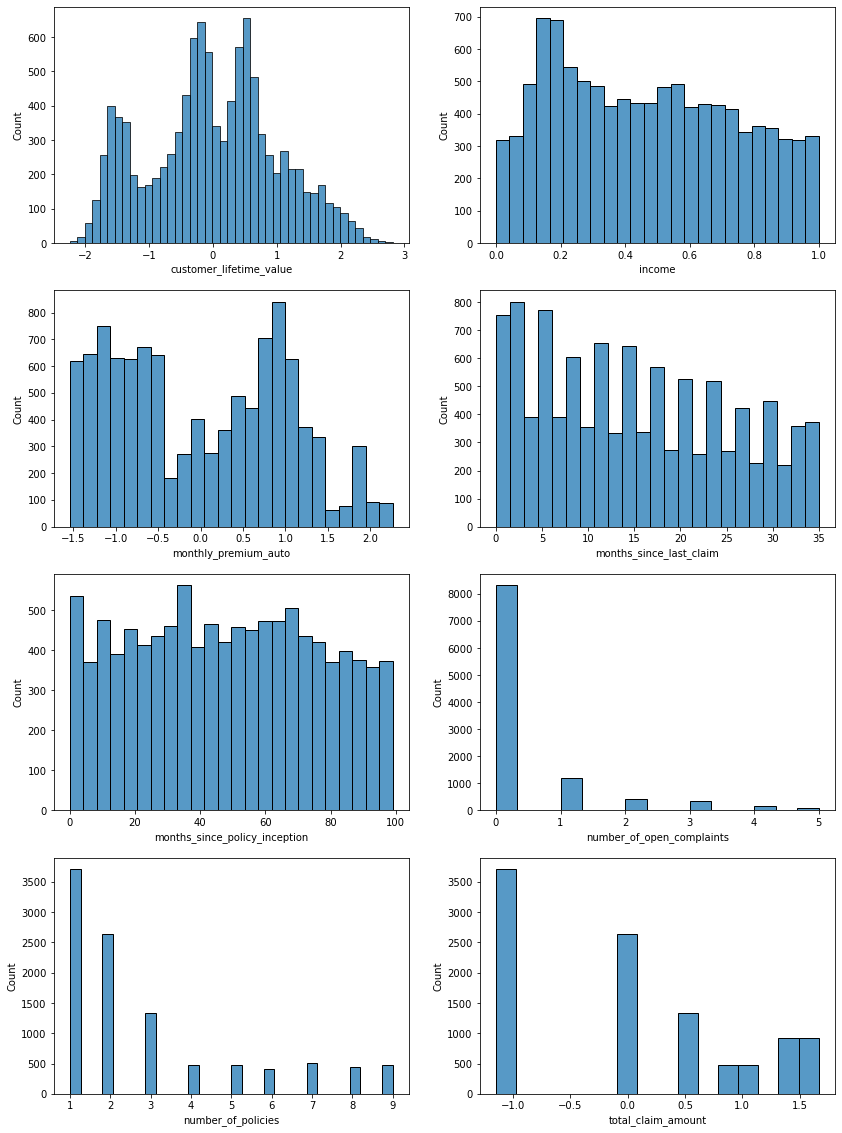

In [37]:
plt.subplots(figsize=(14, 20))
count=1
for i in numerical:
    plt.subplot(4,2,count) 
    sns.histplot(numerical[i]) 
    count+=1
plt.show()

**X Y split**

In [40]:
X=df.drop(['total_claim_amount','months_since_last_claim','months_since_policy_inception','number_of_open_complaints','number_of_policies'], axis=1)
y=df.total_claim_amount
X=X._get_numeric_data()
X

,customer_lifetime_value,income,monthly_premium_auto
0,4809,48029,61
1,2228,92260,64
2,14947,22139,100
3,22332,49078,97
4,9025,23675,117
...,...,...,...
10684,15563,61541,253
10685,5259,61146,65
10686,23893,39837,201
10687,11971,64195,158


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [42]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [44]:
X_train.shape

(7347, 3)

In [45]:
X_test_scaled=std_scaler.transform(X_test)

In [46]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     1756.
Date:                Wed, 09 Nov 2022   Prob (F-statistic):               0.00
Time:                        16:20:56   Log-Likelihood:                -50213.
No. Observations:                7347   AIC:                         1.004e+05
Df Residuals:                    7343   BIC:                         1.005e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        437.3166      2.624    166.646      0.0

In [47]:
#display adjusted R-squared
print(model.rsquared_adj)

0.41745562179489504


## **Model Validation**

In [49]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

In [51]:
X_train

,customer_lifetime_value,income,monthly_premium_auto
950,13583,58544,114
6866,6369,34498,83
6869,5717,68342,72
3318,2665,14315,71
8984,2656,62777,67
...,...,...,...
9952,5143,39268,66
7869,2585,64592,64
5259,2795,69809,70
1349,2913,76638,73


In [52]:
model.coef_ #Get coefitient values from the Model

array([-10.307926  , -30.09783162, 191.84699349])

In [53]:
model.intercept_ #Get the constant value for the Model

437.3165918061794

### Making predictions

In [72]:
y_pred_test=model.predict(X_test_scaled)   # model prediction

y_pred_train=model.predict(X_train_scaled)
y_pred

array([707.20851223, 278.60661016, 607.75750396, ..., 571.77524363,
       656.08462745, 305.43301667])

In [57]:
y_test

10122     939
7019      198
7681      820
7411      513
979       241
         ... 
2312      504
3875     1550
6539      561
6615     1548
8566      132
Name: total_claim_amount, Length: 3150, dtype: int64

## Predicting on new data

In [65]:
np.array(np.array(new_data).reshape(-1,3)).shape

(1, 3)

In [66]:
## new record 
new_data=[2913,80000,100] #Same amount of values as in Model
#Need to scale new_data values since Model is using scaled values
new_data_scaled=std_scaler.transform(np.array(new_data).reshape(-1,3)) 

In [67]:
#Value of the predicted Y(total claim amount)
model.predict(new_data_scaled)

array([448.541146])

## Evaluating Model Performance

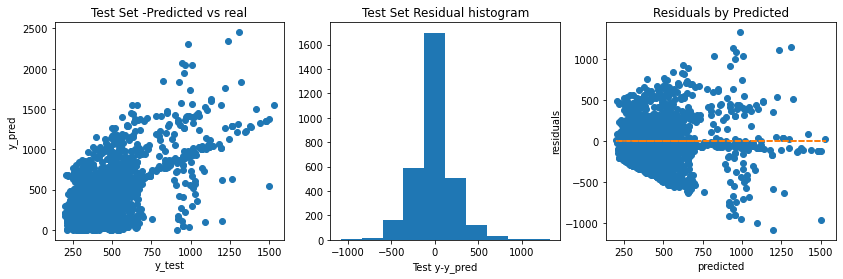

In [69]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

#Homoscdasticity of residuals
ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

## Error metrics

In [73]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

print(mse(y_test,y_pred_test)) #MSE Mean Square Error
print(mae(y_test,y_pred_test)) #MAE Mean Absolut Error

51539.207741728016
154.6036215822777


In [75]:
from sklearn.metrics import r2_score
R2=r2_score(y_test,y_pred)
R2

0.39106704632649514

In [78]:
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
print(R2_test)
print(R2_train) #the one we use with OSL model

0.39106704632649514
0.4176935244813388


In [80]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.39048637281695264

In [81]:
Adj_R2_train= 1 - (1-R2)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
Adj_R2_train

0.3908182653294884

## Feature importance

In [83]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [84]:
features_importances

,Attribute,Importance
2,monthly_premium_auto,191.846993
1,income,30.097832
0,customer_lifetime_value,10.307926


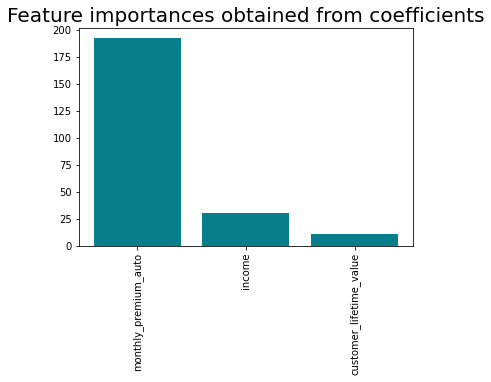

In [85]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()